In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
# np.random.seed(42)

# Simulate data
N = 1000  # Number of observations

# Instrumental variable (e.g., distance to college)
Z = np.random.normal(0, 1, N)

# Treatment variable (e.g., receiving a scholarship)
T = np.random.binomial(1, 0.5, N)  # 50% chance of treatment

# Error terms
epsilon = np.random.normal(0, 1, N)  # Wage shock
nu = np.random.normal(0, 1, N)  # Schooling shock

# Generate schooling variable (affected by treatment and instrument)
S = 2 + 1.5 * Z + 2.0 * T + nu  # Treatment increases schooling

# True wage equation (schooling and treatment affect wages)
wages = 10 + 3 * S + 1.5 * T + epsilon  # True causal effects

# Create DataFrame
df = pd.DataFrame({'Wages': wages, 'Schooling': S, 'Instrument': Z, 'Treatment': T})

# ----- First-stage regression: Schooling on Instrument and Treatment -----
X_first_stage = np.column_stack((Z, T))  # IV and Treatment as predictors
first_stage_model = LinearRegression()
first_stage_model.fit(X_first_stage, S)
S_hat = first_stage_model.predict(X_first_stage)  # Predicted schooling

# ----- Second-stage regression: Wages on predicted schooling and treatment -----
X_second_stage = np.column_stack((S_hat, T))  # Predicted schooling + Treatment
second_stage_model = LinearRegression()
second_stage_model.fit(X_second_stage, wages)
beta_s = second_stage_model.coef_[0]  # Effect of schooling on wages
beta_t = second_stage_model.coef_[1]  # Effect of treatment on wages

# ----- Compute ATE -----
E_S_T1 = np.mean(S[T == 1])  # Expected schooling for treated group
E_S_T0 = np.mean(S[T == 0])  # Expected schooling for control group

ATE = beta_t + beta_s * (E_S_T1 - E_S_T0)

# Print results
print(f"True effect of schooling on wages: 3")
print(f"True effect of treatment on wages: 1.5")
print(f"Estimated effect of schooling (2SLS): {beta_s:.4f}")
print(f"Estimated effect of treatment (2SLS): {beta_t:.4f}")
print(f"Estimated ATE: {ATE:.4f}")


True effect of schooling on wages: 3
True effect of treatment on wages: 1.5
Estimated effect of schooling (2SLS): 3.0342
Estimated effect of treatment (2SLS): 1.3120
Estimated ATE: 7.2155


In [32]:
# True coefficients
beta_s_true = 3.0  # True effect of schooling on wages
beta_t_true = 1.5  # True direct effect of treatment on wages

# Compute expected schooling for treated and control groups
E_S_T1_true = np.mean(S[T == 1])  # Mean schooling for treated group
E_S_T0_true = np.mean(S[T == 0])  # Mean schooling for control group

# Compute True ATE
true_ATE = beta_t_true + beta_s_true * (E_S_T1_true - E_S_T0_true)

# Print results
print(f"True Expected Schooling for Treated (T=1): {E_S_T1_true:.4f}")
print(f"True Expected Schooling for Control (T=0): {E_S_T0_true:.4f}")
print(f"True ATE: {true_ATE:.4f}")


True Expected Schooling for Treated (T=1): 3.9771
True Expected Schooling for Control (T=0): 2.0315
True ATE: 7.3369


In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
N = 1000  # Number of observations

# Instrumental variable (e.g., distance to college)
z1 = np.random.normal(0, 1, N)

# Treatment variable (e.g., receiving a scholarship)
t1 = np.random.binomial(1, 0.5, N)  # 50% chance of treatment

# Error terms
epsilon = np.random.normal(0, 1, N)  # Wage shock
nu = np.random.normal(0, 1, N)  # Schooling shock

# Generate schooling variable (affected by treatment and instrument)
x1 = 2 + 2.5 * z1 + 2 * t1 + nu  # Treatment increases schooling

# True wage equation (schooling and treatment affect wages)
y1 = 10 + 3 * x1 + 1.5 * t1 + epsilon  # True causal effects

# Create DataFrame with labeled columns
df = pd.DataFrame({
    'y1': y1,        # Outcome: Wages
    'x1': x1,        # Other variable: Schooling
    'z1': z1,        # Instrument
    't1': t1         # Treatment
})

# Save DataFrame to CSV
df.to_csv('generated_data.csv', index=False)
print("Data saved to 'generated_data.csv'")

# ------------------------- 2SLS Implementation -------------------------
# Stage 1: Regress treatment (t1) on instrument (z1)
X_first_stage = np.column_stack((z1, t1))  # IV and Treatment as predictors
first_stage_model = LinearRegression()
first_stage_model.fit(X_first_stage, x1)
x1_hat = first_stage_model.predict(X_first_stage)  # Predicted schooling

# Stage 2: Regress outcome (y1) on predicted schooling (x1_hat) and treatment (t1)
X_second_stage = np.column_stack((x1_hat, t1))  # Predicted schooling + Treatment
second_stage_model = LinearRegression()
second_stage_model.fit(X_second_stage, y1)
beta_s_2sls = second_stage_model.coef_[0]  # Effect of schooling on wages (from 2SLS)
beta_t_2sls = second_stage_model.coef_[1]  # Effect of treatment on wages (from 2SLS)

# Print 2SLS estimates
print(f"Estimated effect of schooling (2SLS): {beta_s_2sls:.4f}")
print(f"Estimated effect of treatment (2SLS): {beta_t_2sls:.4f}")

# ------------------------- ATE Computation -------------------------
# Compute expected schooling for treated and control groups
E_S_T1 = np.mean(x1[t1 == 1])  # Mean schooling for treated group
E_S_T0 = np.mean(x1[t1 == 0])  # Mean schooling for control group

# Compute True ATE using the formula
beta_s_true = 3.0  # True effect of schooling on wages
beta_t_true = 1.5  # True direct effect of treatment on wages

# true_ATE = beta_t_true + beta_s_true * (E_S_T1 - E_S_T0)

# Print results
# print(f"True ATE: {true_ATE:.4f}")


Data saved to 'generated_data.csv'
Estimated effect of schooling (2SLS): 3.0215
Estimated effect of treatment (2SLS): 1.6005


In [59]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("generated_data.csv")
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
train_df.to_csv("train.csv", index=False)
val_df.to_csv("valid.csv", index=False)
test_df.to_csv("test.csv", index=False)

data = CausalDataset('./')

model = Vanilla2SLS()
model.fit(data)
ITE = model.predict(data.train)
ATE,_ = model.ATE(data.train)

ATE

Run -1-th experiment for Vanilla2SLS. 
End. --------------------


1.515828155659985

In [41]:
import matplotlib.pyplot as plt

In [43]:
change_values = np.linspace(-2, 5, 20)
change_values

array([-2.        , -1.63157895, -1.26315789, -0.89473684, -0.52631579,
       -0.15789474,  0.21052632,  0.57894737,  0.94736842,  1.31578947,
        1.68421053,  2.05263158,  2.42105263,  2.78947368,  3.15789474,
        3.52631579,  3.89473684,  4.26315789,  4.63157895,  5.        ])

1.6434772945293656
Run -1-th experiment for Vanilla2SLS. 
End. --------------------
0.0 2.636509275626579
1.6321743706585268
Run -1-th experiment for Vanilla2SLS. 
End. --------------------
0.5263157894736842 1.6211408502163314
1.6208714467876857
Run -1-th experiment for Vanilla2SLS. 
End. --------------------
1.0526315789473684 1.5619282533985377
1.609568522916854
Run -1-th experiment for Vanilla2SLS. 
End. --------------------
1.5789473684210527 1.5329148059631343
1.598265599046007
Run -1-th experiment for Vanilla2SLS. 
End. --------------------
2.1052631578947367 1.5119919326471714
1.5869626751751758
Run -1-th experiment for Vanilla2SLS. 
End. --------------------
2.631578947368421 1.4943984575676907
1.575659751304337
Run -1-th experiment for Vanilla2SLS. 
End. --------------------
3.1578947368421053 1.4784963922824699
1.5643568274334962
Run -1-th experiment for Vanilla2SLS. 
End. --------------------
3.6842105263157894 1.4635708393075717
1.5530539035626565
Run -1-th experiment for 

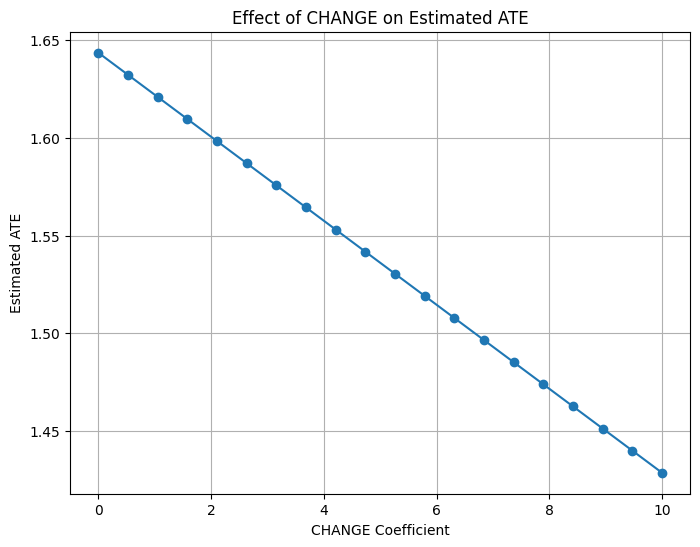

In [65]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
N = 1000  # Number of observations

# Instrumental variable (e.g., distance to college)
z1 = np.random.normal(0, 1, N)

# Treatment variable (e.g., receiving a scholarship)
t1 = np.random.binomial(1, 0.5, N)  # 50% chance of treatment

# Error terms
epsilon = np.random.normal(0, 1, N)  # Wage shock
nu = np.random.normal(0, 1, N)  # Schooling shock

# Generate schooling variable (affected by treatment and instrument)
x1 = 2 + 2.5 * z1 + 1 * t1 + nu  # Treatment increases schooling

change_values = np.linspace(0, 10, 20)  # Varying CHANGE from -2 to 5
ate_values = []

for CHANGE in change_values:
    # True wage equation
    x1 = 2 + 2.5 * z1 + CHANGE * t1 + nu  # Treatment increases schooling
    y1 = 10 + 3 * x1 + 1.5 * t1 + epsilon  # True causal effects

    # Create DataFrame
    df = pd.DataFrame({'y1': y1, 'x1': x1, 'z1': z1, 't1': t1})
    X_first_stage = np.column_stack((z1, t1))  # IV and Treatment as predictors
    first_stage_model = LinearRegression()
    first_stage_model.fit(X_first_stage, x1)
    x1_hat = first_stage_model.predict(X_first_stage)  # Predicted schooling

    # Stage 2: Regress outcome (y1) on predicted schooling (x1_hat) and treatment (t1)
    X_second_stage = np.column_stack((x1_hat, t1))  # Predicted schooling + Treatment
    second_stage_model = LinearRegression()
    second_stage_model.fit(X_second_stage, y1)
    beta_s_2sls = second_stage_model.coef_[0]  # Effect of schooling on wages (from 2SLS)
    beta_t_2sls = second_stage_model.coef_[1]  # Effect of treatment on wages (from 2SLS)
    print(beta_t_2sls)
    # Train-test split
    train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

    # Save files
    train_df.to_csv("train.csv", index=False)
    val_df.to_csv("valid.csv", index=False)
    test_df.to_csv("test.csv", index=False)

    # Load data into causal model
    data = CausalDataset('./')
    model = Vanilla2SLS()
    model.fit(data)
    
    ATE, _ = model.ATE(data.train)  # Extract ATE
    ate_values.append(beta_t_2sls)
    print(CHANGE, ATE)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(change_values, ate_values, marker='o', linestyle='-')
plt.xlabel("CHANGE Coefficient")
plt.ylabel("Estimated ATE")
plt.title("Effect of CHANGE on Estimated ATE")
plt.grid(True)
plt.show()


In [1]:
from mliv.inference import Vanilla2SLS
from mliv.utils import CausalDataset

In [24]:
data = CausalDataset('./')

model = Vanilla2SLS()
model.fit(data)
ITE = model.predict(data.train)
ATE,_ = model.ATE(data.train)

Run -1-th experiment for Vanilla2SLS. 
End. --------------------


In [25]:
print(ATE)

1.0656892002732135


In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Load the dataset
data = pd.read_csv("generated_data.csv")

# First Stage: Regress the treatment (t1) on the instrument (z1) and other regressor (x1)
X_first_stage = sm.add_constant(data[['z1', 'x1']])  # Add constant for intercept
first_stage = sm.OLS(data['t1'], X_first_stage).fit()

# Get the fitted values from the first stage (predicted treatment)
fitted_treatment = first_stage.fittedvalues

# Second Stage: Regress the outcome (y1) on the fitted treatment and other regressor (x1)
X_second_stage = sm.add_constant(data[['x1']])  # Add constant for intercept
second_stage = sm.OLS(data['y1'], X_second_stage.assign(t1=fitted_treatment)).fit()

# The coefficient on the fitted treatment is the ATE
ate = second_stage.params['t1']
print(f"Average Treatment Effect (ATE): {ate}")


Average Treatment Effect (ATE): 1.555065784936636


In [2]:
import pandas as pd

df = pd.read_stata("angrist.dta")
df = df.rename(columns={col: col.replace('v', 'x') for col in df.columns})
df = df.rename(columns={'x18': 'z1', 'x4': 't1', 'x9': 'y1'})
df = df.dropna()

In [39]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 1000

# Generate instrumental variable (Z), assume it's binary
Z = np.random.binomial(1, 0.5, size=n)

# Generate treatment variable (T), assume treatment is assigned based on the instrument (Z) and some noise
T = (0.5 * Z + np.random.normal(0, 0.2, size=n) > 0).astype(int)

# Generate some other regressors (X1, X2, X3)
X1 = np.random.normal(0, 1, size=n)
X2 = np.random.normal(0, 1, size=n)
X3 = np.random.normal(0, 1, size=n)

# Assume the outcome variable (Y) is a linear function of the treatment, instrument, and other covariates
# Y = Beta_T * T + Beta_X1 * X1 + Beta_X2 * X2 + Beta_X3 * X3 + noise
Beta_T = 3  # Treatment effect coefficient
Beta_X1 = 1  # Regressor 1 effect coefficient
Beta_X2 = 2  # Regressor 2 effect coefficient
Beta_X3 = -1  # Regressor 3 effect coefficient

# Generate outcome variable Y
Y = Beta_T * T + Beta_X1 * X1 + Beta_X2 * X2 + Beta_X3 * X3 + np.random.normal(0, 1, size=n)

# Create DataFrame
data = pd.DataFrame({
    'T': T,
    'Z': Z,
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})

# Print the first few rows of the dataset
print(data.head())

# Calculate the true Average Treatment Effect (ATE)
# True ATE is the difference in the mean outcome for treated and untreated individuals
ate_true = np.mean(Y[T == 1]) - np.mean(Y[T == 0])
print(f"True ATE: {ate_true}")


   T  Z        X1        X2        X3         Y
0  1  0 -1.406317  0.874517 -0.150320  3.772121
1  1  1 -0.083106 -0.649765 -0.326696  2.235624
2  1  1 -1.504720 -1.203201 -1.042578 -1.559216
3  1  1  0.760056 -1.042044 -1.172234  1.869701
4  1  0  0.082440 -0.487203  0.464370  4.398882
True ATE: 2.9258682265361906


In [4]:
from sklearn.model_selection import train_test_split
df = df[['y1', 't1', 'z1', "x1", "x10", "x19"]]
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
train_df.to_csv("train.csv", index=False)
val_df.to_csv("valid.csv", index=False)
test_df.to_csv("test.csv", index=False)

In [5]:
df.columns

Index(['y1', 't1', 'z1', 'x1', 'x10', 'x19'], dtype='object')

In [6]:
from linearmodels.iv import IV2SLS

# Define variables
y = "y1"  # Replace with your dependent variable (e.g., test scores)
treatment = "t1"  # Replace with your treatment variable
Z = ["z1"]  # Replace with valid instruments
# X = ['x1', 'x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x10', 'x11',
    #    'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x19', 'x20', 'x21',
    #    'x22', 'x23', 'x24', 'x25', 'x26', 'x27']  # Replace with exogenous controls
X = ['x1', 'x10', 'x19']
# Ensure no missing values
# df = df.dropna()
# print(df[Z + X].corr())

# # Define 2SLS model
model = IV2SLS(dependent=df[y], exog=df[X], endog=df[treatment], instruments=df[Z])

# # Fit the model
results = model.fit()

# # Print summary
print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                     y1   R-squared:                      0.9680
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9680
No. Observations:              899225   F-statistic:                 2.721e+07
Date:                Tue, Feb 25 2025   P-value (F-stat)                0.0000
Time:                        19:14:03   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
x1             0.0308     0.0004     86.257     0.0000      0.0301      0.0315
x10            0.2504     0.0035     70.814     0.00

In [7]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU Found")

CUDA Available: True
CUDA Version: 11.8
GPU Name: NVIDIA GeForce RTX 3080 Ti


In [9]:
from mliv.inference import NN2SLS

data = CausalDataset('./Data/Demand/0.5_1.0_0.0_10000/1/')

model = NN2SLS()
model.fit(data)
ITE = model.predict(data.train)
ATE,_ = model.ATE(data.train)

Run -1-th experiment for NN2SLS. 
<class 'torch.Tensor'>
Epoch 0 ended: train - 554.5031, valid - 549.3373.
<class 'torch.Tensor'>
Epoch 5 ended: train - 3.8782, valid - 3.8856.
<class 'torch.Tensor'>
Epoch 10 ended: train - 3.0731, valid - 3.0676.
<class 'torch.Tensor'>
Epoch 15 ended: train - 2.6925, valid - 2.7056.
<class 'torch.Tensor'>
Epoch 20 ended: train - 2.4826, valid - 2.5081.
<class 'torch.Tensor'>
Epoch 25 ended: train - 2.3603, valid - 2.3918.
<class 'torch.Tensor'>
Epoch 30 ended: train - 2.2420, valid - 2.2802.
<class 'torch.Tensor'>
Epoch 35 ended: train - 2.1887, valid - 2.2408.
<class 'torch.Tensor'>
Epoch 40 ended: train - 2.1281, valid - 2.1893.
<class 'torch.Tensor'>
Epoch 45 ended: train - 2.1169, valid - 2.1862.
<class 'torch.Tensor'>
Epoch 50 ended: train - 2.0954, valid - 2.1758.
<class 'torch.Tensor'>
Epoch 55 ended: train - 2.0180, valid - 2.1039.
<class 'torch.Tensor'>
Epoch 60 ended: train - 1.9158, valid - 1.9962.
<class 'torch.Tensor'>
Epoch 65 ended: tr

In [29]:
from mliv.utils.loaddata import CausalDataset
from mliv.inference import NN2SLS

# Load data using CausalDataset (must have train.csv, valid.csv, test.csv)
data = CausalDataset('C:\\Users\\jxiong3\\Documents\\ecma-final-project\\test_folder\\')

# Move data to CPU or CUDA (if available)
data.to('cuda' if torch.cuda.is_available() else 'cpu')

# Convert to PyTorch tensors
data.tensor()


In [ ]:
# Initialize and Train NN2SLS
model = NN2SLS()
model.fit(data)

# Predict Individual Treatment Effect (ITE)
ITE = model.predict(data.train)

# Estimate the Average Treatment Effect (ATE)
ATE, _ = model.ATE(data.train)

print(f"Estimated ATE: {ATE}")


Run -1-th experiment for NN2SLS. 
<class 'torch.Tensor'>
Epoch 0 ended: train - 9.8133, valid - 9.8157.
<class 'torch.Tensor'>
Epoch 5 ended: train - 9.7377, valid - 9.7320.
<class 'torch.Tensor'>
Epoch 10 ended: train - 9.7563, valid - 9.7491.
<class 'torch.Tensor'>
Epoch 15 ended: train - 9.6978, valid - 9.6926.
<class 'torch.Tensor'>
Epoch 20 ended: train - 9.7203, valid - 9.7156.
<class 'torch.Tensor'>
Epoch 25 ended: train - 9.7151, valid - 9.7110.
<class 'torch.Tensor'>
Epoch 30 ended: train - 9.7047, valid - 9.7003.
<class 'torch.Tensor'>
Epoch 35 ended: train - 9.6974, valid - 9.6928.


In [22]:
from mliv.utils import CausalDataset

train_causal = CausalDataset(
    y=train_data["y1"].reshape(-1, 1),
    t=train_data["t1"].reshape(-1, 1),
    z=train_data["z1"].reshape(-1, 1),
    x=cat([train_data["x1"], train_data["x10"], train_data["x19"]])
)

val_causal = CausalDataset(
    y=val_data["y1"].reshape(-1, 1),
    t=val_data["t1"].reshape(-1, 1),
    z=val_data["z1"].reshape(-1, 1),
    x=cat([val_data["x1"], val_data["x10"], val_data["x19"]])
)

test_causal = CausalDataset(
    y=test_data["y1"].reshape(-1, 1),
    t=test_data["t1"].reshape(-1, 1),
    z=test_data["z1"].reshape(-1, 1),
    x=cat([test_data["x1"], test_data["x10"], test_data["x19"]])
)


NameError: name 'cat' is not defined

In [16]:
ATE

np.float32(-12.550736)

In [ ]:
from mliv.inference import Poly2SLS
from mliv.inference import NN2SLS
from mliv.inference import OneSIV
from mliv.inference import KernelIV
from mliv.inference import DualIV
from mliv.inference import DFL
from mliv.inference import AGMM
from mliv.inference import DeepGMM
from mliv.inference import DFIV
# from mliv.inference import DeepIV           # Tensorflow & keras

for mod in [Vanilla2SLS,Poly2SLS,NN2SLS]:
    model = mod()
    model.config['num'] = 100
    model.config['epochs'] = 10
    model.fit(data)
    ATE,_ = model.ATE(data.train)
    print(ATE)
#     print(mod)

Run -1-th experiment for Vanilla2SLS. 
End. --------------------
-12.550736
Run -1-th experiment for Poly2SLS. 


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
from mliv.dataset.demand import gen_data
from mliv.utils import CausalDataset
gen_data()

The path: ./Data/Demand/0.5_1.0_0.0_10000/
Generate Demand datasets - 0/10. 
Generate Demand datasets - 1/10. 
Generate Demand datasets - 2/10. 
Generate Demand datasets - 3/10. 
Generate Demand datasets - 4/10. 
Generate Demand datasets - 5/10. 
Generate Demand datasets - 6/10. 
Generate Demand datasets - 7/10. 
Generate Demand datasets - 8/10. 
Generate Demand datasets - 9/10. 


{'dataName': 'Demand',
 'exps': 10,
 'num': 10000,
 'rho': 0.5,
 'alpha': 1.0,
 'beta': 0.0,
 'seed': 2022,
 'num_val': 10000,
 'seed_val': 3033,
 'seed_tst': 4044}